Data Wrangling and EDA:

In [32]:
##load essentials
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [33]:
##import data

measurements = pd.read_csv("measurements.csv")
visits = pd.read_csv("site_visits.csv")
water_quality = pd.read_csv("water_quality_sites.csv")

## check basic information
measurements.info()
visits.info()
water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389721 entries, 0 to 389720
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   checksum     389721 non-null  object 
 1   Measurement  389721 non-null  object 
 2   Value        389721 non-null  float64
dtypes: float64(1), object(2)
memory usage: 8.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29187 entries, 0 to 29186
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Timestamp    29187 non-null  object
 1   SiteID       29187 non-null  object
 2   Day of Week  29187 non-null  int64 
 3   Scientist    29187 non-null  object
 4   Verified By  29187 non-null  object
 5   checksum     29187 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column            Non-Null Cou

At first glance, all 3 data sets do not seem to have null values. However, they might have missing values when we pivot the data sets.

It seems that the columns that are floats or integers are needed for modelling while the object columns are possibly just strings and may not be needed for modelling. However, checksum and siteID may be useful for modelling for identification and joining datasets.

Columns Altitude, Catchment area, Catchment Height, Longitude and Latitude are not 
needed for modelling as we already have a more distinct idenfier for sites (SiteID column). Column checksum can be used to merge the measurements and site visits but can be removed once merged as the values in the columns seem irrelvant.


In [34]:
##Combine datasets
#Pivot measurements 
test = measurements.pivot(index = 'checksum', columns = ['Measurement'], values = 'Value')

#Drop NA
test.dropna(inplace=True)
#Merge to visits and water quality
join = pd.merge(water_quality, visits)
#Merge to measurements
final = pd.merge(join, test, on='checksum')
#drop unneccessary columns
final.drop(columns=['checksum','Altitude', 'Catchment area', 'Catchment height', 'Day of Week', 'Scientist', 'Verified By'], inplace = True)
final

,SiteID,Region,Name,Longitude,Latitude,Timestamp,Absorbance Coefficient,Ammonia,Cloud Cover,Dissolved Oxygen Saturation,Dissolved Reactive Phosphate,E Coli,Electrical Conductivity,Nitrate + Nitrite,Ring Temp,Total Nitrogen,Total Phosphate,Turbidity,Water Temp,pH
0,AK1,Auckland,Hoteo at Gubbs,174.516776,-36.387085,2005-02-17T10:15:00Z,18.51,8.0,3.0,88.9,21.4,120.00,190.0,155.0,15.070833,489.0,65.0,8.20,20.1,7.43
1,AK1,Auckland,Hoteo at Gubbs,174.516776,-36.387085,2005-03-16T09:40:00Z,15.91,6.0,2.0,90.7,14.1,41.00,204.0,4.0,15.370426,261.0,51.0,6.00,18.9,7.62
2,AK1,Auckland,Hoteo at Gubbs,174.516776,-36.387085,2005-04-28T10:20:00Z,14.50,1.0,7.0,89.6,17.7,86.00,227.0,6.0,-15.637455,283.0,48.0,4.90,14.3,7.66
3,AK1,Auckland,Hoteo at Gubbs,174.516776,-36.387085,2005-05-25T10:00:00Z,26.63,28.0,5.0,82.1,27.8,203.00,207.0,694.0,-15.699682,1269.0,77.0,9.50,15.6,7.22
4,AK1,Auckland,Hoteo at Gubbs,174.516776,-36.387085,2005-06-15T10:00:00Z,16.35,26.0,0.0,88.5,28.0,1046.24,198.0,637.0,14.813845,1108.0,74.0,12.00,10.5,7.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13214,WN5,Wellington,Ruamahanga at SH2,175.604835,-40.763879,2020-08-19T13:10:00Z,1.40,4.0,8.0,102.4,0.7,7.40,64.5,34.0,-12.864292,65.0,3.0,1.88,6.7,7.74
13215,WN5,Wellington,Ruamahanga at SH2,175.604835,-40.763879,2020-09-15T13:05:00Z,6.90,1.0,3.0,101.2,2.0,4.10,32.6,24.0,-14.150972,92.0,17.0,10.30,8.9,7.10
13216,WN5,Wellington,Ruamahanga at SH2,175.604835,-40.763879,2020-10-28T12:25:00Z,7.20,4.0,8.0,99.9,2.2,7.40,39.4,20.0,14.291256,95.0,5.0,2.81,9.2,7.32
13217,WN5,Wellington,Ruamahanga at SH2,175.604835,-40.763879,2020-11-18T12:15:00Z,8.70,4.0,8.0,101.0,2.0,131.30,38.0,17.0,15.429841,123.0,8.0,3.61,12.8,7.49


The Columns needed where the original pivoted data from measurements.csv, 5 columns pertaining to site information and one more column for timestamp.
We removed the other unwanted columns. Checksum was removed as while looking at the information of the pivoted dataframe using info(), the rows are indexed starting from 0 which means there
were 15 original columns. As checksum column values were irrelevant past merging dataframes, it was safe to remove.

Producing a pairplot to figure out any possible variable interactions. Removing identifier columns except SiteID for identification. This also helps in preventing the numeric values of latitude etc appearing in plot when they are irrelevant.

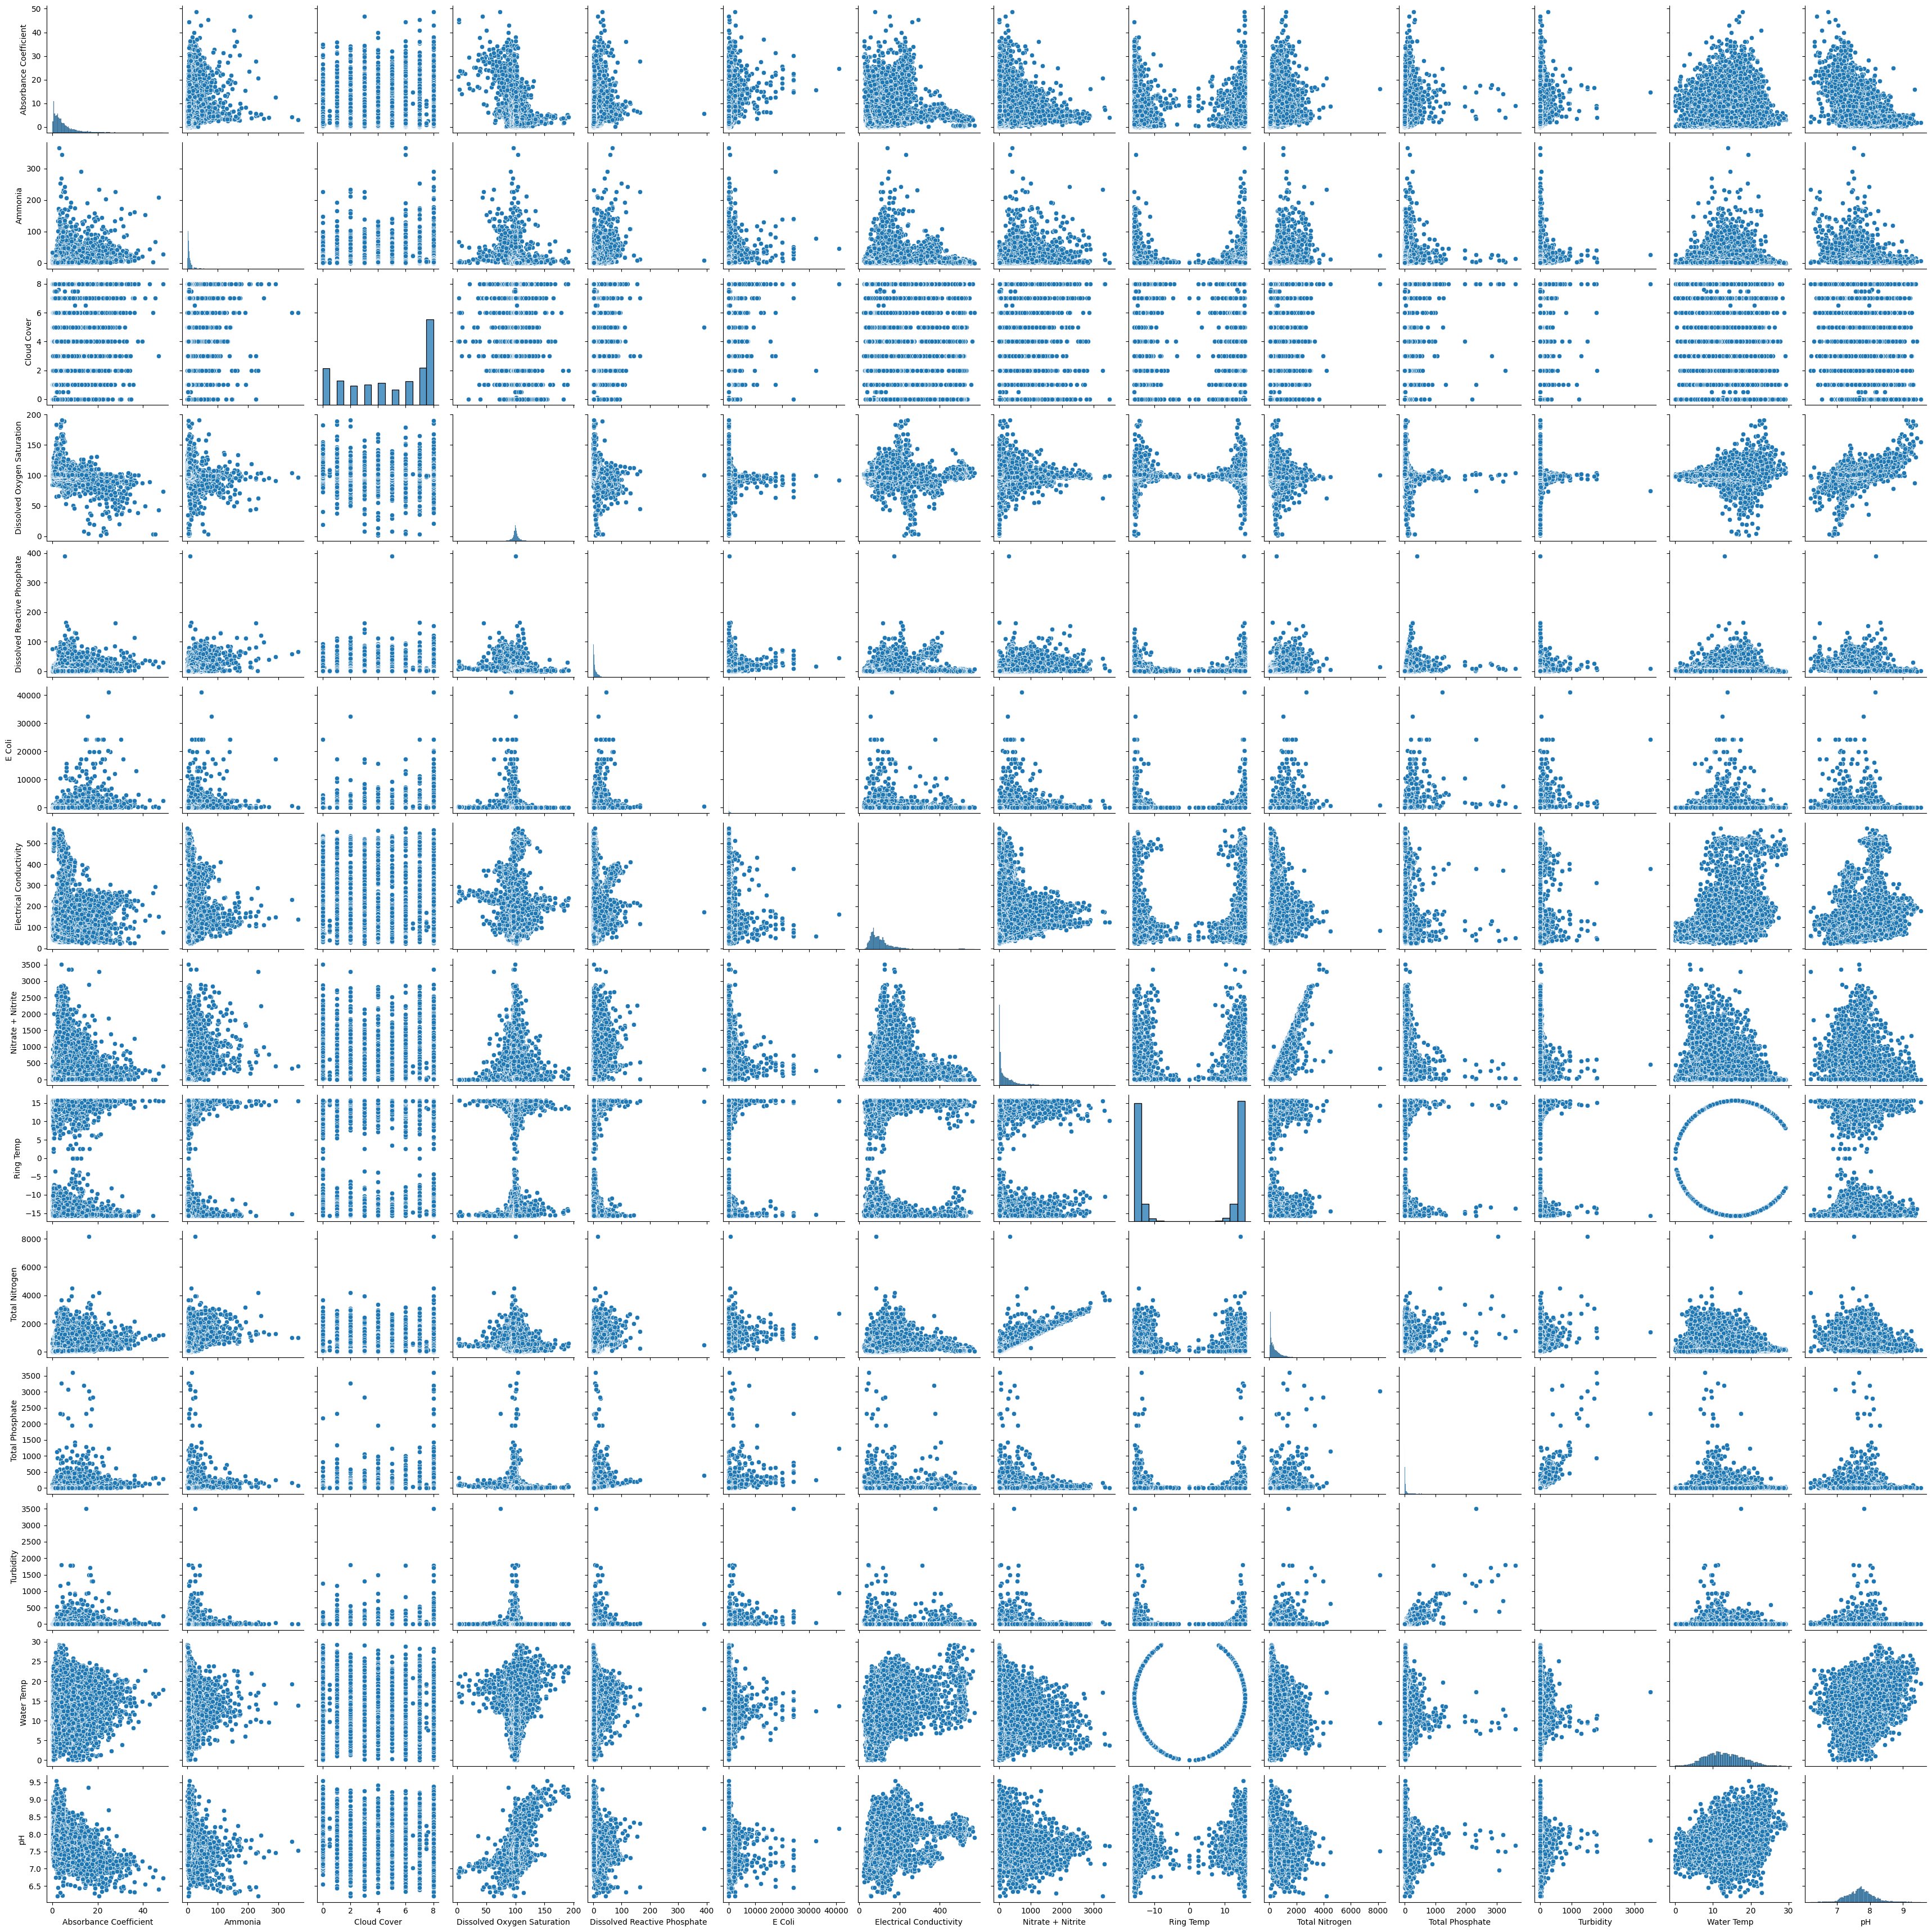

In [35]:
#Plot
#Remove identifier columns except SiteID for identification
data = final.drop(columns = ['Region', 'Name', 'Longitude', 'Latitude', 'Timestamp'])
sns.pairplot(data)

From the dataset table and the pairplot. It appears that some columns are essentially duplicates of another column or completely irrelevant. 
From the pairplot, we can see that ring temperature and cloud cover variables produces strange plots, this suggests that the column values are completely irrelvant as their plot shape suggests that the data is either completely random or just made up. Therefore they are needed to be removed before modelling as they are nuisance variables.
Some variables are pairs such as Nitrate and Nitrite, total Nitrogen and Dissolved Reactive Phosphate, total Phosphate. This can be seen in the pairplot as their plots are linear to their pair. As the total Nitrogen and total phosphate are more conclusive variables, their counterparts shall be removed as they are just additional information of the same measurement.

Filter values of E Coli greater than or equal to 550 per 100ml and producing csv file

In [36]:
#Filtering data to e coli >550
filter = final[final['E Coli'] >= 550]
filter = filter.groupby(['SiteID', 'Region', 'Name', 'Longitude', 'Latitude']).count()
out = filter[['E Coli']].sort_values(by = 'E Coli', ascending = False)
out.to_csv("out.csv")

Supervised Learning:

In [37]:
#Load modelling packages
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
#Drop unwanted columns identified in previous step
data = final.drop(columns = ['Region', 'Name', 'Longitude', 'Latitude', 'Timestamp', 'Cloud Cover', 'Nitrate + Nitrite', 'Dissolved Reactive Phosphate', 'Ring Temp'])
#Convert and get dummies for categorical variable SiteID
#Remove numbers from SiteID to group sites according to region
data['SiteID'] = data['SiteID'].str.replace('[0-9]', '', regex=True)
data = pd.get_dummies(data, columns= ['SiteID'])

#Choosing pH as measurement feature
target = 'pH'
feature = data.drop(columns=[target]).columns.values #feature would be the column values for tree plot later
X = data.drop(columns=[target]).to_numpy()
t = data[target].to_numpy()

#Train data, no random state
X_train, X_test, t_train, t_test = train_test_split(X, t, train_size=0.7)

#Linear Regression on all available instances
model1 = LinearRegression().fit(X_train, t_train)
test1 = model1.predict(X_test)
rsq1 = r2_score(t_test, test1)
print(f"rsq = {rsq1}")

#Coefficients of model
names = data.drop(columns=target).columns.values
m1_details = pd.DataFrame({
    'input_variable' : np.hstack([ 'intercept', names]),
    'coefficient' : np.hstack([ model1.intercept_, model1.coef_ ])
})
m1_details

rsq = 0.6356744963537392


,input_variable,coefficient
0,intercept,5.623651
1,Absorbance Coefficient,-0.013708
2,Ammonia,-0.001213
3,Dissolved Oxygen Saturation,0.018907
4,E Coli,0.000006
5,Electrical Conductivity,0.001221
6,Total Nitrogen,-0.000071
7,Total Phosphate,-0.000011
8,Turbidity,0.000147
9,Water Temp,0.012552


From the table, the positively correlate variables to pH are Dissolved Oxygen Saturation, E Coli, Electrical Conductivity, Total Phosphate, Turbididty and Water Temperature with Dissolved Oxygen Saturation being the most correlated among the variables. The negatively correlated variables are Absorbance Coefficient, Ammonia and total Nitrogen with absorbance coefficient being the most negatively correlated among them.

,Size,Rsq
0,1.0,0.664772
1,2.0,0.742669
2,3.0,0.769254
3,5.0,0.781881
4,8.0,0.789509
5,13.0,0.790294
6,21.0,0.786451
7,32.0,0.775023
8,55.0,0.751132
9,89.0,0.713211


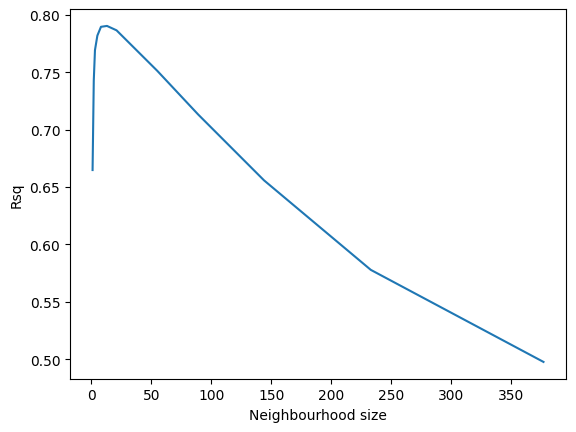

In [39]:
#K Nearest Neighbour
#Standardise values
scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train)
Z_test = scaler.transform(X_test)

#KNN
neighbour = [1,2,3,5,8,13,21,32,55,89,144,233,377]
rsq_values = []
for n in neighbour:
    model2 =KNeighborsRegressor(n_neighbors = n).fit(Z_train, t_train)
    test2 = model2.predict(Z_test)
    rsq = r2_score(t_test, test2)
    rsq_values.append([n, rsq])

#Plot Rsquared values
rsq_np = np.array(rsq_values)
plot = pd.DataFrame({
    'Neighbourhood size' : rsq_np[:, 0],
    'Rsq' : rsq_np[:, 1]
})
sns.lineplot(data=plot, x='Neighbourhood size', y='Rsq')
#Table of rsq_values
df1 = pd.DataFrame(rsq_np, columns=['Size', 'Rsq'])
df1


From the plot, we can see that neighbourhood size of 8 has the best R squared score.
The R squared values have a very strong incline until neighbourhood size of 8 and then it steadily declines as the neighbourhood size gets bigger.
Standardising the values of train and test is needed as K Nearest Neighbours are sensitive to large values where the model can be greatly influenced by them.

,Split,Rsq
0,2.0,0.607584
1,3.0,0.632665
2,5.0,0.648040
3,8.0,0.661709
4,13.0,0.680314
5,21.0,0.706906
6,34.0,0.717143
7,55.0,0.721060
8,89.0,0.710912
9,144.0,0.690190


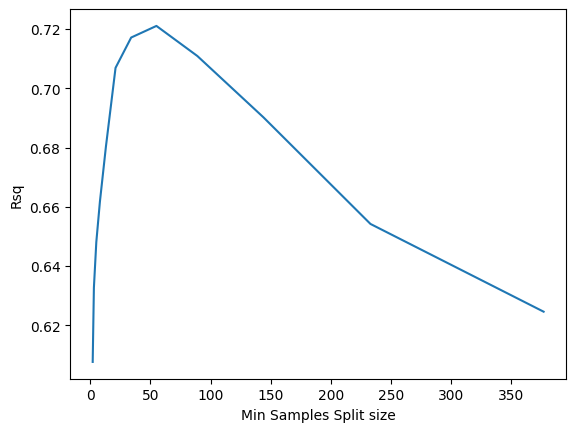

In [40]:
#CART
rsq_size = []
min_samples_split = [2,3,5,8,13,21,34,55,89,144,233,377]

#Get Rsq values
for n in min_samples_split:
    model3 = DecisionTreeRegressor(min_samples_split = n).fit(X_train, t_train)
    test3 = model3.predict(X_test)
    rsq_size.append([n, r2_score(t_test, test3)])

#Plot Rsquared values
rsq_np2 = np.array(rsq_size)
plot2 = pd.DataFrame({
    'Min Samples Split size' : rsq_np2[:, 0],
    'Rsq' : rsq_np2[:, 1]
})
sns.lineplot(data=plot2, x='Min Samples Split size', y='Rsq')
df2 = pd.DataFrame(rsq_np2, columns=['Split', 'Rsq'])
df2


From the plot, we can see that min samples split size of 55 has the best Rsquared score.
The values of Rsquared has a steady increase until size 55 then a slight decrease at size 89 then it steadily decreases as the size gets larger.


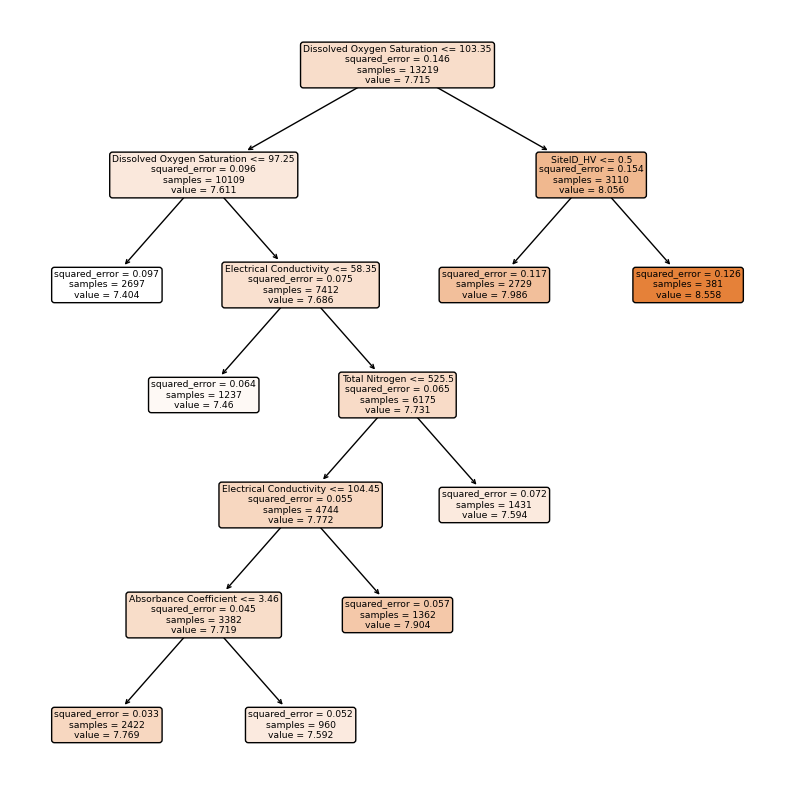

In [41]:
#Plot Tree
tree = DecisionTreeRegressor(min_samples_split=3000)
tree.fit(X, t)
plt.figure(figsize=(10,10))
plot_tree(tree, rounded=True, filled=True, feature_names=feature);

From the decision tree, the clusters are split the most often with the variables, Dissolved Oxygen Saturation and Electrical conductivity. This matches the observations in the previous linear regression coefficients where Dissolved Oxygen Saturation was identified to be the most positively correlated variable to pH and Electrical Conductivity was second most correlated. 

Variables Total Nitrogen and Absorbance Coefficient also appears in the longest branch suggesting that they have direct impact on pH. 

One region did appear on the decision tree (SiteID_HV). This suggests that the site would have a higher pH reading than other sites since it is alone on the right side of the decision tree.

Judging by the tree, we can conclude that any site that has a site id of HV and a high Dissolved Oxygen Saturation would have a high pH reading.

Final Analysis:

In [42]:
#More imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

from sklearn.datasets import make_friedman1

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

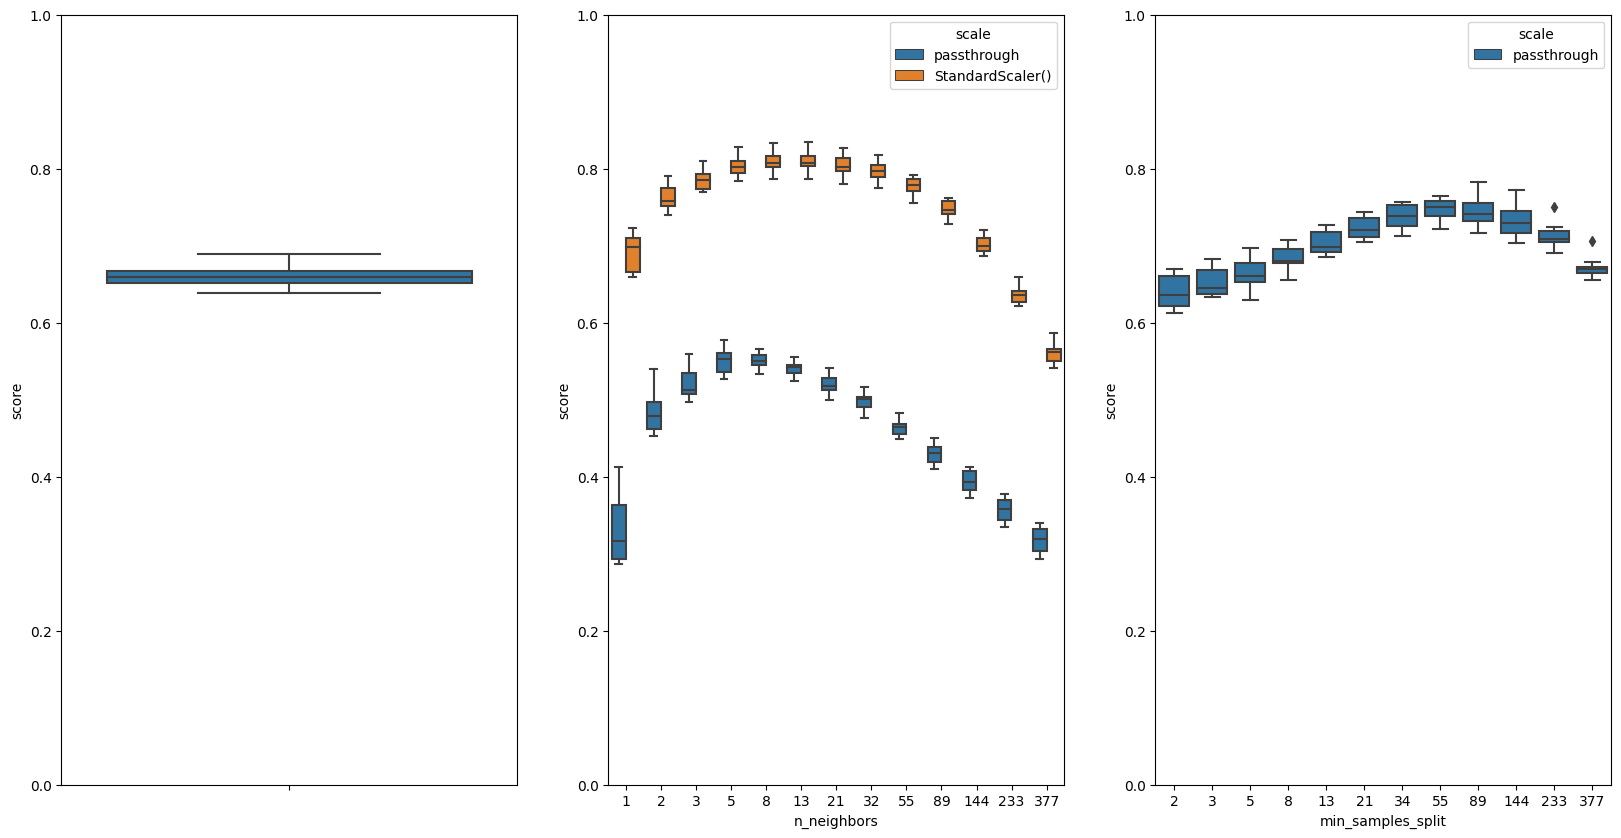

In [43]:
#Boxplot of 3 Learning methods
#Cleanup function taken from Lab 6. Required for cleaning up data frame
def cleanup_cv_results(cv_results, model_name='model', scale_name='scale'):
    import re
    r = re.compile(f"param_({model_name}__)*")
    cleaned_names = cv_results.rename(columns=lambda x: r.sub('', x))
    r = re.compile(f"split.+_test_score")
    header_cols = [ c for c in cleaned_names.columns.values if not r.match(c) ]
    return cleaned_names.melt(id_vars=header_cols, var_name='split', value_name='score')

#define learning methods
scaler = StandardScaler()
lm = LinearRegression()
knn = KNeighborsRegressor()
CART = DecisionTreeRegressor()

#Set up neighbours and min samples split size
neighbour = [1,2,3,5,8,13,21,32,55,89,144,233,377]
min_samples_split = [2,3,5,8,13,21,34,55,89,144,233,377]

#create tune grids
lm_tune_grid = {
    'scale' : [ 'passthrough' ],
    'model' : [ lm ]
}

knn_tune_grid = {
    'scale' : [ 'passthrough', scaler ],
    'model' : [ knn ],
    'model__n_neighbors' : neighbour
}

Cart_tune_grid = {
    'scale' : [ 'passthrough'],
    'model' : [CART ],
    'model__min_samples_split' : min_samples_split
}
#Comparison tune grid
cmp_tune_grid = [
    lm_tune_grid,
    knn_tune_grid,
    Cart_tune_grid
]

folds = KFold(n_splits=10, shuffle=True)
ml_pipe = Pipeline([ ('scale', 'passthrough'), ('model', DummyRegressor()) ])

#Code from lab 6 to produce boxplots
cv = GridSearchCV(ml_pipe, cmp_tune_grid, cv=folds, n_jobs=-1)
cv.fit(X, t)
clean = cleanup_cv_results(pd.DataFrame(cv.cv_results_))

#Actual plot, adjusted code from lab 6
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
sns.boxplot(data=clean[clean['model']==lm], y='score', ax=axs[0])
sns.boxplot(data=clean[clean['model']==knn], x='n_neighbors', y='score', hue='scale', ax=axs[1])
sns.boxplot(data=clean[clean['model']==CART], x='min_samples_split', y='score', hue='scale', ax=axs[2])
axs[0].set(ylim=(0, 1))
axs[1].set(ylim=(0, 1))
axs[2].set(ylim=(0, 1))
plt.show()


From the plots, we can see a big comparison between the three learning models. Linear regression has a single bar as it only has one equation while K nearest neighbours and CART have multiple boxes as they are tested with cross validation. For K Nearest Neighbours, there is a big difference in scores between standardised values(StandardScaler()) and non standardised values(passthrough). This is because K Nearest Neighbours are greatly affected by variation in variables. For CART Decision Trees, there is not as much variation between the box plots and they all remain within a small range of score values.(0.61 - 0.71)

We can see that K Nearest Neighbours produced a better R squared Score followed by CART Decision Trees and then linear regression. K Nearest Neighbours at neighbour size of 8 had a better R squared score by 0.05 compared to CART Decision Trees and 0.1 better score compared to Linear Regression.

Although K Nearest Neighbours had a better R Squared score for the highest peak of neighbour size. CART Decision Trees have a overall better performance than the two other learning methods as it had a steady decline which was lesser compared to K Nearest Neighbours. This suggests that for the range of bigger sample sizes (in this case up to 377) CART Decision Trees are the better learning method as it does not have a big performance drop compared to the other 2 learning methods.

Addressing the question of what is the point of building predictive models when the three target variables are easy to measure, building the models would be useful when only one measurement can be obtained as the relationships between variables can be seen and learned by the trained models. This would reduce the work required as we only need to obtain one measurement and can use the model to predict the other two with relatively good accuracy.